In [49]:
import pandas as pd
import numpy as np

# 读取CSV文件
df_women = pd.read_csv('women.csv', index_col=0, header=0)  # 设置索引列和标题行

# 查看最后3行数据
df_women.tail(3)

# 查看整个数据框
df_women


,height,weight
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126
6,63,129
7,64,132
8,65,135
9,66,139
10,67,142


In [50]:
# 查看数据框的形状（行数和列数）
df_women.shape  

(15, 2)

In [51]:
#查看数据框的列名
df_women.columns  

Index(['height', 'weight'], dtype='object')

In [52]:
# 查看数据框的描述性统计信息
df_women.describe()  # 输出描述性统计信息

,height,weight
count,15.000000,15.000000
mean,65.000000,136.733333
std,4.472136,15.498694
min,58.000000,115.000000
25%,61.500000,124.500000
50%,65.000000,135.000000
75%,68.500000,148.000000
max,72.000000,164.000000


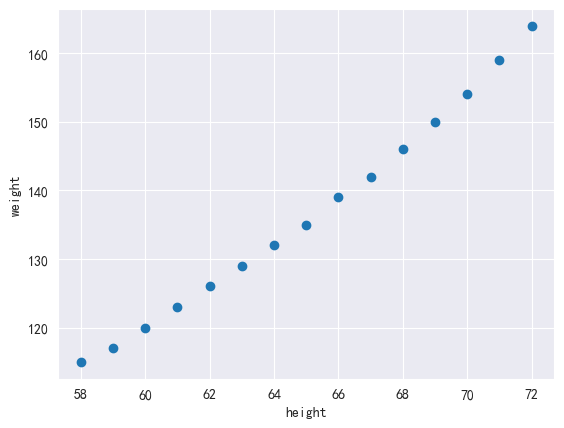

In [53]:
import matplotlib.pyplot as plt  # 导入绘图库
# 创建散点图
plt.scatter(df_women["height"], df_women["weight"])  # 散点图
# 设置 x 轴标签
plt.xlabel("height")  # x 轴标签
# 设置 y 轴标签
plt.ylabel("weight")  # y 轴标签
# 显示图形
plt.show()

In [54]:
x = df_women[['height']]  # 提取 DataFrame 中的 "height" 列，结果为 DataFrame 类型
y = df_women['weight']    # 提取 DataFrame 中的 "weight" 列，结果为 Series 类型

In [55]:
type(x)  # 输出 pandas.core.frame.DataFrame，表示 X 是一个 DataFrame

pandas.core.frame.DataFrame

In [56]:
y=np.ravel(y)

In [57]:
import numpy as np
# 创建一个二维数组
a = np.array([[1, 2, 3], [4, 5, 6]])
# 使用 np.ravel() 将二维数组转换为一维数组
b = a.ravel()
print(b)  # 输出 [1 2 3 4 5 6]

[1 2 3 4 5 6]


In [58]:
import statsmodels.api as sm

In [59]:
x

,height
1,58
2,59
3,60
4,61
5,62
6,63
7,64
8,65
9,66
10,67


In [60]:
import statsmodels.api as sm
x = sm.add_constant(x) # 使用 add_constant 函数在输入的特征矩阵中添加一个常数列（截距项）。
x

,const,height
1,1.0,58
2,1.0,59
3,1.0,60
4,1.0,61
5,1.0,62
6,1.0,63
7,1.0,64
8,1.0,65
9,1.0,66
10,1.0,67


In [61]:
myModel = sm.OLS(y,x)

In [62]:
results = myModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.09e-14
Time:                        15:18:10   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.5167      5.937    -14.741      0.0

E:\Software\anaconda3\envs\python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [63]:
results.params

const    -87.516667
height     3.450000
dtype: float64

In [64]:
results.rsquared

np.float64(0.9910098326857505)

In [65]:
results.f_pvalue

np.float64(1.090972958599788e-14)

In [66]:
sm.stats.stattools.durbin_watson(results.resid)

np.float64(0.3153803748621822)

In [67]:
sm.stats.stattools.jarque_bera(results.resid)

(np.float64(1.659573064430949),
 np.float64(0.43614237873239226),
 np.float64(0.7893583826332149),
 np.float64(2.5963042257389626))

In [68]:
y_predict = results.predict()
y_predict

array([112.58333333, 116.03333333, 119.48333333, 122.93333333,
       126.38333333, 129.83333333, 133.28333333, 136.73333333,
       140.18333333, 143.63333333, 147.08333333, 150.53333333,
       153.98333333, 157.43333333, 160.88333333])

Text(0, 0.5, '体重')

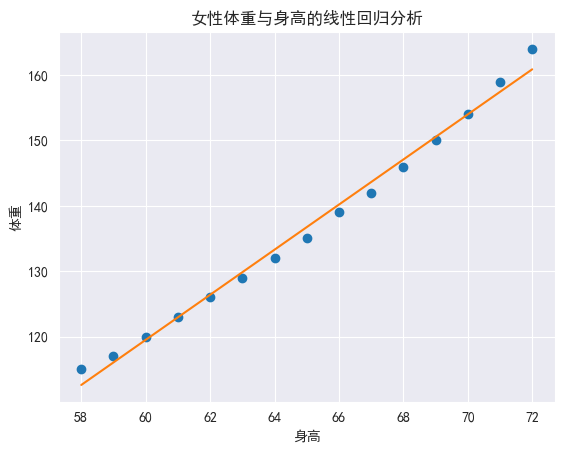

In [69]:
# plt.rcParams["font.family"] = "Arial Unicode MS"  # 注释：#号代表注释内容
plt.rcParams["font.family"] = "simHei"  # 设置字体为黑体以便显示中文

plt.plot(df_women["height"], df_women["weight"], "o")  # 绘制散点图
plt.plot(df_women["height"], y_predict, "-")  # 绘制线性回归拟合线

plt.title('女性体重与身高的线性回归分析')  # 图表标题
plt.xlabel('身高')  # x 轴标签
plt.ylabel('体重')  # y 轴标签


In [70]:
import pandas as pd
import numpy as np

In [71]:
X = df_women[["height"]]
y = df_women["weight"]

# column_stack 是一个用于将一维或二维数组沿列方向堆叠的实用工具函数
X = np.column_stack((X, np.power(X, 2), np.power(X, 3)))
X


array([[    58,   3364, 195112],
       [    59,   3481, 205379],
       [    60,   3600, 216000],
       [    61,   3721, 226981],
       [    62,   3844, 238328],
       [    63,   3969, 250047],
       [    64,   4096, 262144],
       [    65,   4225, 274625],
       [    66,   4356, 287496],
       [    67,   4489, 300763],
       [    68,   4624, 314432],
       [    69,   4761, 328509],
       [    70,   4900, 343000],
       [    71,   5041, 357911],
       [    72,   5184, 373248]])

In [72]:
# 例如
import numpy as np
tup = (np.array([1, 2]), np.array([4, 5]))
result = np.column_stack(tup)
print(result)


[[1 4]
 [2 5]]


In [73]:
# 左边增加一列常数 1.0
X_add_const = sm.add_constant(X)

X_add_const


array([[1.00000e+00, 5.80000e+01, 3.36400e+03, 1.95112e+05],
       [1.00000e+00, 5.90000e+01, 3.48100e+03, 2.05379e+05],
       [1.00000e+00, 6.00000e+01, 3.60000e+03, 2.16000e+05],
       [1.00000e+00, 6.10000e+01, 3.72100e+03, 2.26981e+05],
       [1.00000e+00, 6.20000e+01, 3.84400e+03, 2.38328e+05],
       [1.00000e+00, 6.30000e+01, 3.96900e+03, 2.50047e+05],
       [1.00000e+00, 6.40000e+01, 4.09600e+03, 2.62144e+05],
       [1.00000e+00, 6.50000e+01, 4.22500e+03, 2.74625e+05],
       [1.00000e+00, 6.60000e+01, 4.35600e+03, 2.87496e+05],
       [1.00000e+00, 6.70000e+01, 4.48900e+03, 3.00763e+05],
       [1.00000e+00, 6.80000e+01, 4.62400e+03, 3.14432e+05],
       [1.00000e+00, 6.90000e+01, 4.76100e+03, 3.28509e+05],
       [1.00000e+00, 7.00000e+01, 4.90000e+03, 3.43000e+05],
       [1.00000e+00, 7.10000e+01, 5.04100e+03, 3.57911e+05],
       [1.00000e+00, 7.20000e+01, 5.18400e+03, 3.73248e+05]])

In [74]:
# 最小二乘法
myModel_updated = sm.OLS(y, X_add_const)


In [75]:
results_updated = myModel_updated.fit()
print(results_updated)


In [76]:
results_updated.summary()

E:\Software\anaconda3\envs\python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           2.07e-20
Time:                        15:18:11   Log-Likelihood:                 1.3441
No. Observations:                  15   AIC:                             5.312
Df Residuals:                      11   BIC:                             8.144
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -896.7476    294.575     -3.044      0.011   -1545.102    -248.393
x1            46.4108     13.655      3.399      0.006      16.356      76.466
x2            -0.7462      0.211     -3.544      0.005      -1.210      -0.283
x3             0.0043      0.001      3.940      0.002       0.002       0.007
==============================================================================
Omnibus:                        0.028   Durbin-Watson:                   2.388
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.127
Skew:                           0.049   Prob(JB):                        0.939
Kurtosis:                       2.561   Cond. No.                     1.25e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
# 查看斜率及截距项
print('查看斜率及截距项：', results_updated.params)


查看斜率及截距项： const   -896.747633
x1        46.410789
x2        -0.746184
x3         0.004253
dtype: float64


In [78]:
# 预测值
y_predict_updated = results_updated.predict()
y_predict_updated


array([114.63856209, 117.40676937, 120.18801264, 123.00780722,
       125.89166846, 128.86511168, 131.95365223, 135.18280543,
       138.57808662, 142.16501113, 145.9690943 , 150.01585147,
       154.33079796, 158.93944911, 163.86732026])

Text(0, 0.5, '体重')

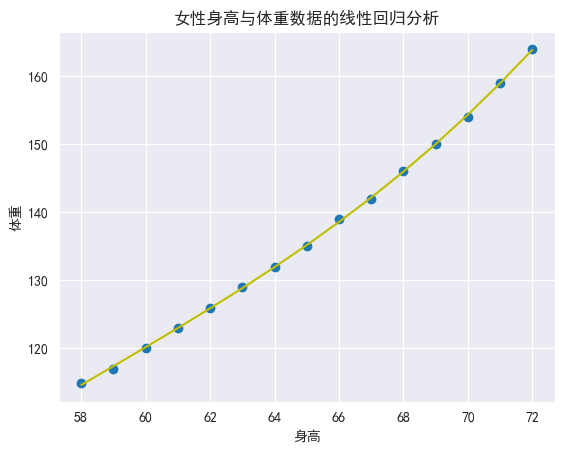

In [79]:
# 设置字体
plt.rcParams['font.family'] = "simHei"
# plt.rcParams["font.family"] = 'Heiti TC'  # 注释掉的代码

# 绘制散点图
plt.scatter(df_women["height"], df_women["weight"])

# 绘制线性回归拟合直线
plt.plot(df_women["height"], y_predict_updated, "y")

# 添加标题、坐标轴标签
plt.title("女性身高与体重数据的线性回归分析")
plt.xlabel("身高")
plt.ylabel("体重")


In [80]:
h = 63.5
results_updated.predict((1, h, np.power(h, 2), np.power(h, 3)))


array([130.39340008])